<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/16_2_OpenCV_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D1%86_(%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. OpenCV. Распознавание лиц (практика)
3. [Домашняя работа](https://colab.research.google.com/drive/1ROlDnTWg80AlhffK5duVa1vuHrM9Q8HQ)

Распознать лица на видео или фотографии очень просто, используя
библиотеку OpenCV. Для начала, чтобы распознать лицо на изображении
нужно найти, где само лицо расположено. Для этого мы должны выделить
его основные компоненты, такие как нос, лоб, глаза, губы и т.д. Для
решения данной задачи используются шаблоны, они же признаки Хаара
на подобии таких:

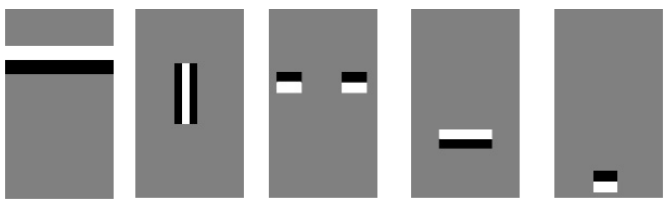

Если шаблоны соответствуют конкретным областям на изображении,
можно считать, что на изображении есть человеческое лицо. На самом
деле подобных шаблонов гораздо больше. Для каждого из них считается
разность между яркостью белой и черной областей. Это значение
сравнивается с эталоном и принимается решение о том, есть ли здесь
часть человеческого лица или нет. Этот метод называется методом
Виолы-Джонса (так же известен, как каскады Хаара). Однако, если на
изображении не одно большое лицо, а много мелких, то лица не будут
обнаружены, так как они будут меньше шаблонов. Для того чтобы искать
на всем фото лица разных размеров используется метод скользящего окна.
Именно внутри этого окна и высчитываются примитивы.

**Метод скользящего окна** — алгоритм трансформации, позволяющий
сформировать из членов временного ряда набор данных, который может
служить обучающим множеством для построения модели
прогнозирования. Под окном в данном случае понимается временной
интервал, содержащий набор значений, которые используются для
формирования обучающего примера. В процессе работы алгоритма окно
смещается по временной последовательности на единицу наблюдения, и
каждое положение окна образует один пример. Окно как бы скользит по
всему изображению. После каждого прохождения изображения окно
увеличивается, чтобы найти лица большего масштаба.
После того, как лицо было обнаружено, нужно определить кому
принадлежит это лицо. Для решения этой задачи используется алгоритм
Local Binary Patterns. Суть его заключается в том, что мы разбиваем
изображение на части и в каждой такой части каждый пиксель
сравнивается с соседними 8 пикселями. Если значение центрального
пикселя больше соседнего, то пишем 0, в противном случае 1. И так для
каждого пикселя получается некоторое число. Далее на основе этих чисел
для всех частей, на которые разбивали фотографию, считается
гистограмма. Все гистограммы со всех частей объединяются в один
вектор характеризующий изображение в целом. Если нужно узнать
насколько похожи два лица, придется вычислить для каждого из них
такой вектор и сравнить их.

## Поиск лиц на фотографии

Вот мы с вами и подошли к самому интересному — к поиску лиц на фото.
Для этого мы воспользуемся каскадом Хаара. Все, что нам нужно, уже есть в библиотеке OpenCV: и натренированные признаки, и набор функций, реализующих все
алгоритмы.

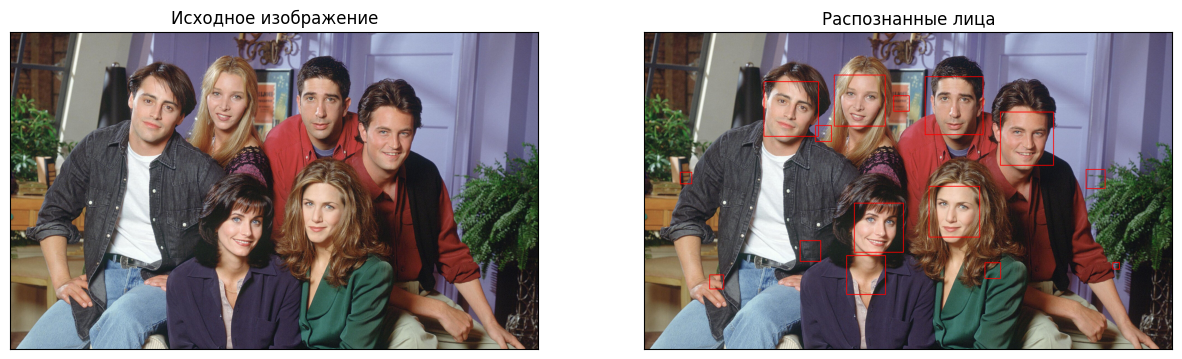

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')

# Просто присвоить значение мы не можем, так как произойдет просто присваивание по ссылке
# т.е. обе переменые будут ссылаться на одну и ту же область памяти
# изменение одной переменной привет к изменению другой
img2 = img.copy() # копирование переменной


# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img)

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)




fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

## Поиск лиц на фотографии (улучшение)

Мы видим, что алгоритм распознал помимо лиц, какие-то странные области. Чтобы исключить их, необходимо вызывать метод `detectMultiScale` с дополнительными параметрами:

  * **scaleFactor** определяет скачок коэффициента масштабирования, например, если мы не найдем изображение в текущем масштабе, следующий размер для проверки будет, в нашем случае, в 2 раза больше текущего размера.

  * **minNeighbors** - это порог, который определяет минимальное количество смежных прямоугольников, необходимое для сохранения текущего прямоугольника. Его можно использовать для повышения надежности детектора лиц, в случае, если распознавание лиц работает не так, как ожидалось, уменьшая пороговое значение.

  * **minSize** - минимальный размер распознанной области.

Перепишем пример, определив параметры для `detectMultiScale`:

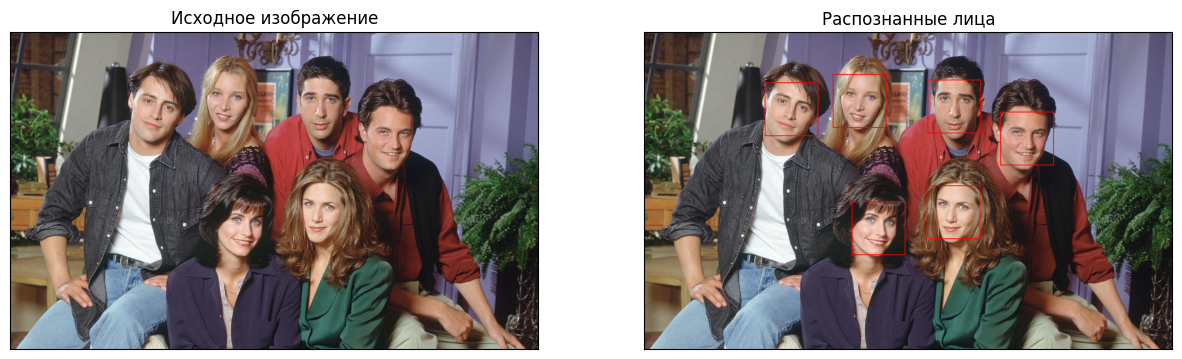

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица')

pyplot.show()

## Поиск улыбки на фотографии

А теперь давайте немного усложним нашу задачу и определим: кто из актеров "Друзей" улыбается на фотографии?

Для этого мы используем еще один каскад признаков Хаара `haarcascade_smile.xml`.
Чтобы увеличить точность нашего алгоритма, мы будем искать улыбки внутри областей найденных лиц, чтобы у нас случайным образом не начали улыбаться дверь или цветы.

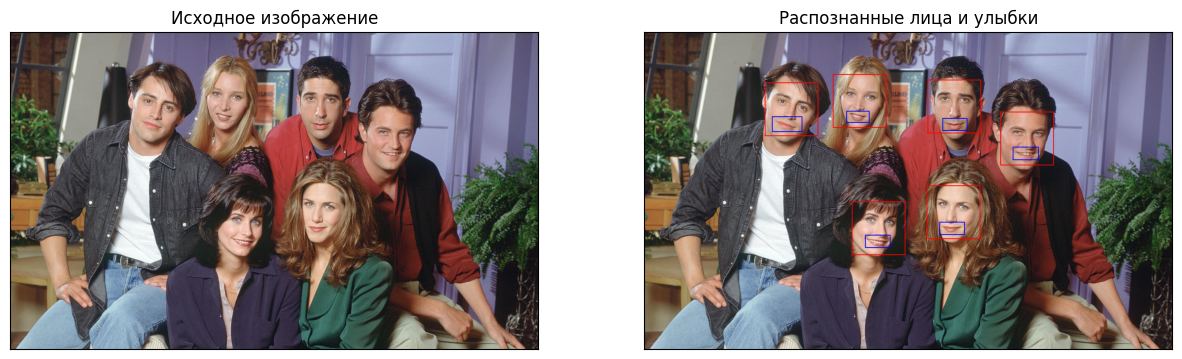

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска улыбок
classifier_smile = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_smile.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания улыбок
    smiles = classifier_smile.detectMultiScale(face, scaleFactor=1.2, minNeighbors=40, minSize=(20, 20))

    for (sx, sy, sw, sh) in smiles:
            # отрисовка прямоугольника около улыбки
            cv2.rectangle(face, (sx, sy), ((sx + sw), (sy + sh)), (255, 0, 0), 2)



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и улыбки')

pyplot.show()

Учитывая, что признаками улыбки обычно считают поднятые уголки губ или обнаженные зубы, то каскады отработали отлично. Меняя параметры метода `detectMultiScale` можно добиться того, что на изображении распознается только улыбка Моники, как наиболее ярко выраженное сочетание обоих признаков.

## Подрисуем усы

Еще раз посмотрим на фотографию и поставим задачу следующим образом: подрисовать всем усы!

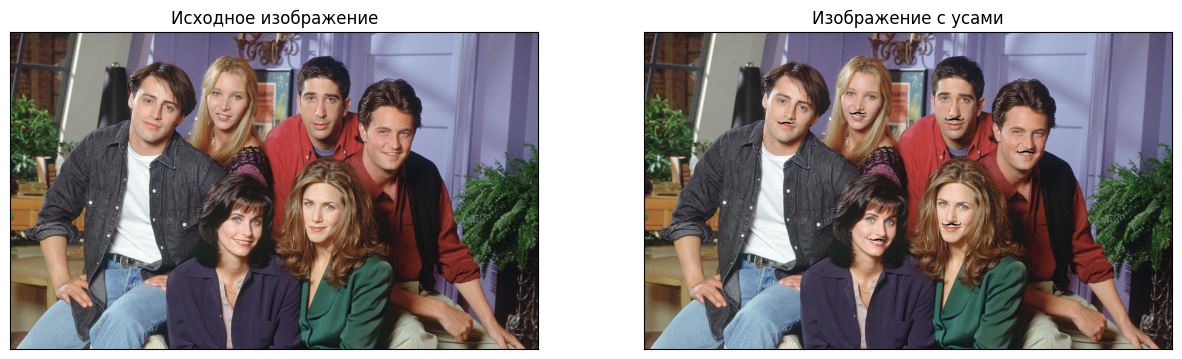

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/academy.ai/moustache.png', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/academy.ai/haarcascade_mcs_mouth.xml', None, quiet=True)


# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# Загрузим усы
moustache_mask = cv2.imread('./moustache.png')
h_mask, w_mask = moustache_mask.shape[:2]


# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# загрузка каскада Хаара для поиска рта
classifier_mouth = cv2.CascadeClassifier("./haarcascade_mcs_mouth.xml")


# выполнение распознавания лица
bboxes = classifier_face.detectMultiScale(img, scaleFactor=1.3, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box

    # найденная область с лицом
    face = img2[y:y + height, x:x + width]

    # нас интересует только 1/3 часть лица снизу
    # выполнение распознавания рта (только в нижней части лица)
    mouth_rects = classifier_mouth.detectMultiScale(img2[y+int(2*height/3):y + height, x:x + width], scaleFactor=1.3, minNeighbors=10, minSize=(20, 20))


    if len(mouth_rects) > 0:
        # Берем первый найденный объект, наиболее вероятное расположение рта
        (mx, my, mw, mh) = mouth_rects[0]
        mx -= int(0*mw) # сдвигать усы по оси х не будем
        my = int(2*height/3-5) # восстанавливаем координату относительно лица и немного приподнимаем усы на 5px

        # область рта
        mouth = face[my:my+mh, mx:mx+mw]

        # Маштабируем усы до размера рта
        moustache_mask_small = cv2.resize(moustache_mask, (mw, mh), interpolation=cv2.INTER_AREA)

        # Сделаем наши усы черно-белые и применим инвариантный бинарный порог, как это делали с номерами
        gray_mask = cv2.cvtColor(moustache_mask_small, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

        # Чтобы инвертировать маску в OpenCV, мы используем функцию cv2.bitwise_not(),
        # которая выполняет побитовую операцию not над отдельными пикселями.
        # https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-not
        mask_inv = cv2.bitwise_not(mask)

        # побитовое AND для двух изображений, результирующая - пиксели присутствующие на обоих изображениях
        masked_mouth = cv2.bitwise_and(moustache_mask_small, moustache_mask_small, mask=mask)
        #  https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise#bitwise-and
        masked_face = cv2.bitwise_and(mouth, mouth, mask=mask_inv)

        # Объединяем рот и усы
        face[my:my+mh, mx:mx+mw] = cv2.add(masked_mouth, masked_face)



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Изображение с усами')

pyplot.show()

И так, что мы сделали:
1. Мы нашли на фотографиях лица.
2. Внутри области лица выделили область равную 1/3 от высоты лица и в ней выполнили поиск рта. Мы это сделали для того, чтобы облегчить работу каскадам. Иногда они умудряются принимать прическу за второй рот.
3. Заранее подготовленную картинку усов масштабировали до размера рта.
4. Объединили рот и усы, для этого мы использовали пороговые функции, маскирование и побитовые операции.

Побитовые операции часто применяются при обработке изображений, однако, практически не применяются для задач машинного обучения, и в частности глубокого обучения. Поэтому мы не будем на них останавливаться и заострять внимание. Тем более ваш уровень компетенций к текущему уроку уже достиг достаточного уровня для того, чтобы самостоятельно, опираясь на документацию разбираться в чужом коде.

В домашней работе вам также понадобятся операции с массивами. Поэтому перед выполнением домашней работы изучите документацию (https://docs.opencv.org/2.4.13.2/modules/core/doc/operations_on_arrays.html?highlight=bitwise), посмотрите как эти методы были использованы в примере выше (про усы), и тем самым вы получите представление о реальной работе программиста. Вы должны усвоить, что работа программиста - это постоянный поиск аналогичных примеров в интернете, работа с документацией новых и часто обновляемых библиотек, умение разбираться в "чужом коде", а самое главное применять эти знания в своих задачах.  

## Распознавание глаз на фотографии

Распознавание глаз - это функция, которая существует в любом современном цифровом фотоаппарате. Чтобы убрать эффект красных глаз, сначала надо обнаружить эти самые глаза, а после понять, а стоит ли их корректировать.

И как вы, наверное, уже догадались - мы используем еще один каскад.

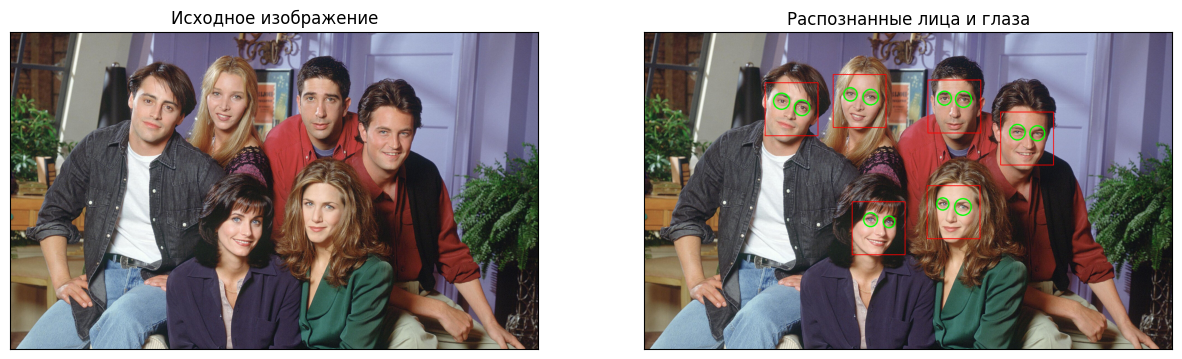

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline


gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./friends.jpg')
img2 = img.copy()

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)




fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()


Библиотека OpenCV достаточно интересная и многогранная. Ее функционал не ограничивается только вопросами распознания по признакам Хаара. С ее помощью можно даже делать  панорамные фотографии из нескольких фотографий, совмещая схожие точки, или, например, удалять лишние объекты с фотографий, восстанавливая фон.

Но на данном этапе, мы сконцентрируемся на задачах распознания с помощью каскадов и перейдем к [домашней работе](https://colab.research.google.com/drive/1ROlDnTWg80AlhffK5duVa1vuHrM9Q8HQ) для закрепления полученных знаний.